Importing libraries

In [0]:
import tensorflow as tf
import numpy as np


Load training and testing data from tensorflow datasets

In [0]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


Reshaping data from (28,28) to (28,28,1) and normalising data

In [0]:
train_images=train_images.reshape(60000, 28, 28, 1)
train_images=train_images/255.0
test_images=test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

Creating model using keras

In [0]:
def mnist_train(dropout=0,kernel_size=(3,3),feature1=6,feature2=16):
  model=tf.keras.Sequential([tf.keras.layers.Conv2D(feature1,kernel_size,activation=tf.nn.relu,input_shape=(28,28,1)),    #convolution layer 
                             tf.keras.layers.Dropout(dropout),                                                           #dropout layer
                            tf.keras.layers.MaxPooling2D(),                                                               #Pooling layer
                            tf.keras.layers.Conv2D(feature2,kernel_size,activation=tf.nn.relu),
                             tf.keras.layers.Dropout(dropout),
                            tf.keras.layers.MaxPooling2D(),
                            tf.keras.layers.Flatten(),                                                                      #flattening weights
                            tf.keras.layers.Dense(120,activation=tf.nn.relu),                            
                            tf.keras.layers.Dense(84,activation=tf.nn.relu),
                            tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])                               #Using Categorical crossentropy and adam
  model.summary()

  return model

In [0]:
model=mnist_train(dropout=0.4,feature1=16,feature2=32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

Training model 

In [0]:
history=model.fit(x=train_images,y=train_labels,epochs=40,verbose=1,batch_size=128,validation_data=(test_images,test_labels))

Epoch 1/40
469/469 [==============================] - 33s 71ms/step - loss: 0.2752 - accuracy: 0.9170 - val_loss: 0.1553 - val_accuracy: 0.9778
Epoch 2/40
469/469 [==============================] - 33s 70ms/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.1052 - val_accuracy: 0.9837
Epoch 3/40
469/469 [==============================] - 33s 70ms/step - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0833 - val_accuracy: 0.9874
Epoch 4/40
469/469 [==============================] - 33s 70ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0678 - val_accuracy: 0.9894
Epoch 5/40
469/469 [==============================] - 33s 70ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0633 - val_accuracy: 0.9886
Epoch 6/40
469/469 [==============================] - 33s 70ms/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0569 - val_accuracy: 0.9899
Epoch 7/40
469/469 [==============================] - 33s 70ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0522 - val_accuracy:

<Figure size 432x288 with 0 Axes>

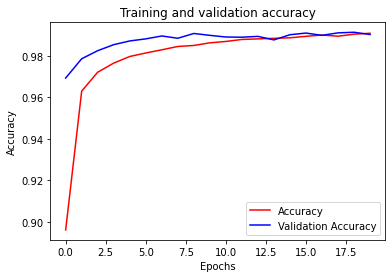

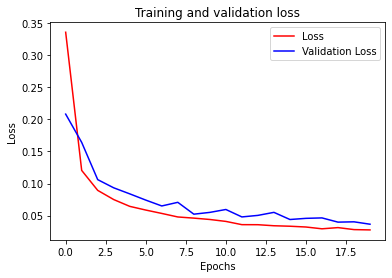

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
